QUESTION 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
#feature_data=pd.read_table('feature_presence540 (1).txt',delim_whitespace=True,header=None)

feature_data=pd.read_table('feature_presence540.txt',sep='\s+',header=None)

In [5]:
feature_data.shape

(555, 17)

In [6]:
feature_data.dropna(inplace=True)

In [7]:
feature_data.shape

(540, 17)

In [8]:
label_data=pd.read_excel('aggregateRockData.xlsx',header=None)

In [9]:
label_data.shape

(540, 14)

In [10]:
label_data.rename(columns={0:'rock_number',1:'rock_category',3:'token_number'},inplace=True)

In [11]:
label_data.head(100)

,rock_number,rock_category,2,token_number,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,6,16,1,50,16,16,55,27,0.609756,0.195122,0.195122,0.670732
96,97,1,7,1,3,47,8,27,23,59,0.573171,0.097561,0.329268,0.280488
97,98,1,7,2,3,49,20,13,29,53,0.597561,0.243902,0.158537,0.353659
98,99,1,7,3,2,62,7,13,51,31,0.756098,0.085366,0.158537,0.621951


In [12]:
feature_data.rename(columns={0:'rock_number',2:'token_number'},inplace=True)

In [13]:
feature_data.head(100)

,rock_number,1,token_number,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.00,0.30,0.0,0.00,0.10,0.32,0.0,0.00
1,2,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.00,0.10,0.0,0.05,0.05,0.70,0.0,0.05
2,3,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.00,0.35,0.0,0.00,0.05,0.60,0.0,0.00
3,4,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.00,0.10,0.0,0.00,0.10,0.86,0.0,0.00
4,5,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.00,0.10,0.0,0.00,0.05,0.87,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,6,16,0.00,0.00,0.00,0.0,0.10,0.00,0.75,0.00,0.0,0.00,0.00,0.00,0.0,0.00
96,97,7,1,0.40,0.05,0.00,0.0,0.05,0.00,0.05,0.20,0.0,0.10,0.00,0.43,0.0,0.10
97,98,7,2,0.10,0.15,0.00,0.0,0.00,0.05,0.10,0.35,0.0,0.00,0.05,0.23,0.0,0.00
98,99,7,3,0.95,0.00,0.00,0.0,0.05,0.05,0.10,0.10,0.0,0.05,0.00,0.95,0.0,0.05


In [14]:
d1_select=label_data[['rock_number','rock_category']]

In [15]:
d2_select=feature_data[['rock_number','token_number']+ feature_data.columns[4:15].tolist()]

In [16]:
d2_select['rock_number']=d2_select['rock_number'].astype(str)

<ipython-input-16-6f6c5d9117e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_select['rock_number']=d2_select['rock_number'].astype(str)


In [17]:
d1_select['rock_number']=d1_select['rock_number'].astype(str)

<ipython-input-17-482e31f32a25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_select['rock_number']=d1_select['rock_number'].astype(str)


In [18]:
final_data=pd.merge(d1_select,d2_select,on='rock_number')

In [19]:
final_data=final_data.astype(float)

In [20]:
final_data.columns=['rock_number','rock_category','token_number','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14']

In [21]:
final_data.head(17)

,rock_number,rock_category,token_number,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
0,1.0,1.0,1.0,0.15,0.0,0.0,0.00,0.05,0.00,0.30,0.0,0.00,0.10,0.32
1,2.0,1.0,2.0,0.15,0.0,0.0,0.05,0.00,0.00,0.10,0.0,0.05,0.05,0.70
2,3.0,1.0,3.0,0.00,0.0,0.0,0.05,0.00,0.00,0.35,0.0,0.00,0.05,0.60
3,4.0,1.0,4.0,0.85,0.0,0.0,0.05,0.00,0.00,0.10,0.0,0.00,0.10,0.86
4,5.0,1.0,5.0,0.80,0.0,0.0,0.00,0.00,0.00,0.10,0.0,0.00,0.05,0.87
5,6.0,1.0,6.0,0.25,0.0,0.0,0.00,0.00,0.05,0.25,0.0,0.00,0.05,0.55
6,7.0,1.0,7.0,0.50,0.0,0.0,0.00,0.00,0.00,0.10,0.0,0.00,0.05,0.82
7,8.0,1.0,8.0,0.00,0.0,0.0,0.00,0.00,0.00,0.20,0.0,0.00,0.20,0.00
8,9.0,1.0,9.0,0.30,0.0,0.0,0.00,0.00,0.00,0.30,0.0,0.00,0.05,0.54
9,10.0,1.0,10.0,0.20,0.0,0.0,0.00,0.00,0.00,0.15,0.0,0.00,0.10,0.44


In [22]:
final_data=final_data.iloc[:480]

In [23]:
final_data.head(50)

,rock_number,rock_category,token_number,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
0,1.0,1.0,1.0,0.15,0.0,0.00,0.00,0.05,0.00,0.30,0.0,0.00,0.10,0.32
1,2.0,1.0,2.0,0.15,0.0,0.00,0.05,0.00,0.00,0.10,0.0,0.05,0.05,0.70
2,3.0,1.0,3.0,0.00,0.0,0.00,0.05,0.00,0.00,0.35,0.0,0.00,0.05,0.60
3,4.0,1.0,4.0,0.85,0.0,0.00,0.05,0.00,0.00,0.10,0.0,0.00,0.10,0.86
4,5.0,1.0,5.0,0.80,0.0,0.00,0.00,0.00,0.00,0.10,0.0,0.00,0.05,0.87
5,6.0,1.0,6.0,0.25,0.0,0.00,0.00,0.00,0.05,0.25,0.0,0.00,0.05,0.55
6,7.0,1.0,7.0,0.50,0.0,0.00,0.00,0.00,0.00,0.10,0.0,0.00,0.05,0.82
7,8.0,1.0,8.0,0.00,0.0,0.00,0.00,0.00,0.00,0.20,0.0,0.00,0.20,0.00
8,9.0,1.0,9.0,0.30,0.0,0.00,0.00,0.00,0.00,0.30,0.0,0.00,0.05,0.54
9,10.0,1.0,10.0,0.20,0.0,0.00,0.00,0.00,0.00,0.15,0.0,0.00,0.10,0.44


In [24]:
final_data.dropna(inplace=True)

In [25]:
final_data['rock_category']=final_data['rock_category'].astype(int)

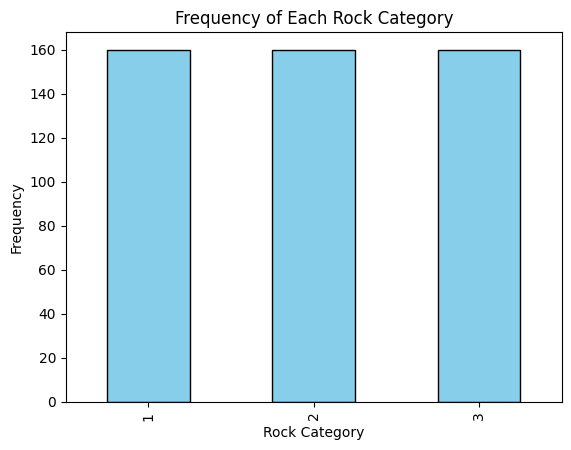

In [26]:
category_counts = final_data['rock_category'].value_counts()
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rock Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Rock Category')
plt.show()

In [27]:
for col in final_data.columns[3:14]:  # Assuming 0-based indexing for columns 4 to 14
    final_data[col] = pd.to_numeric(final_data[col], errors='coerce')

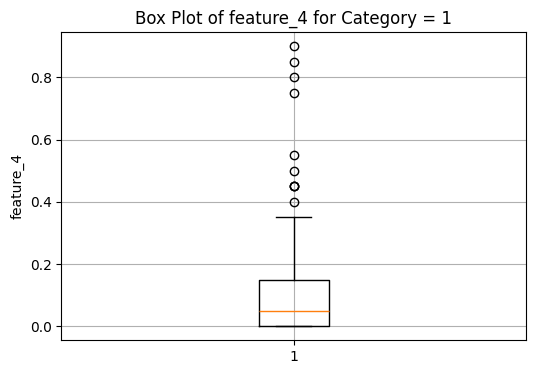

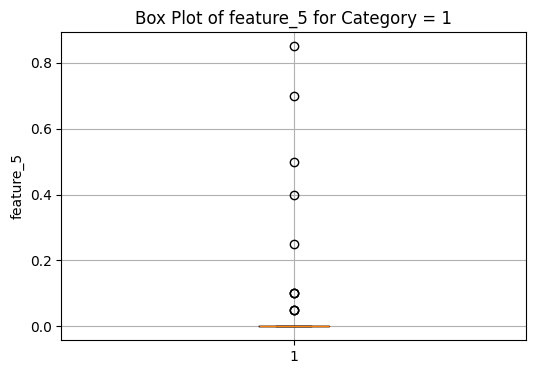

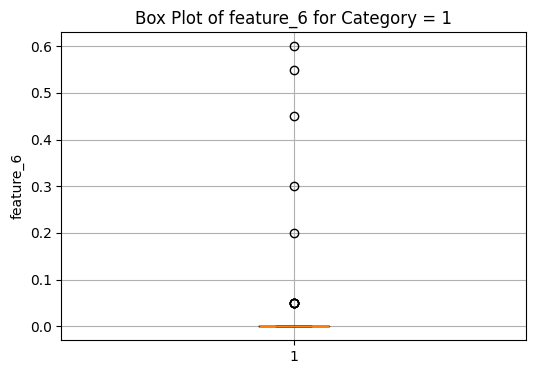

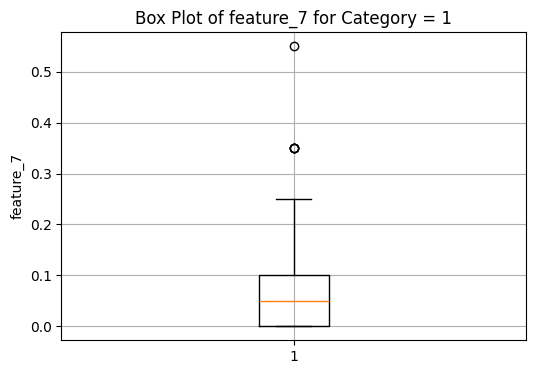

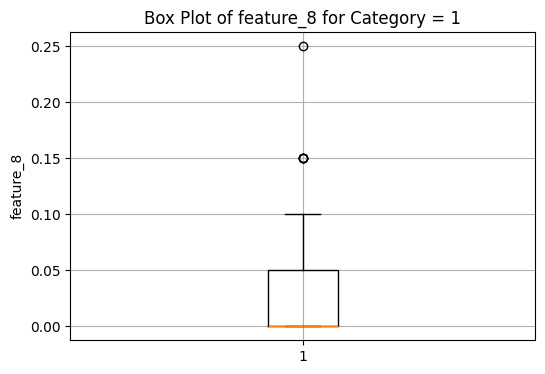

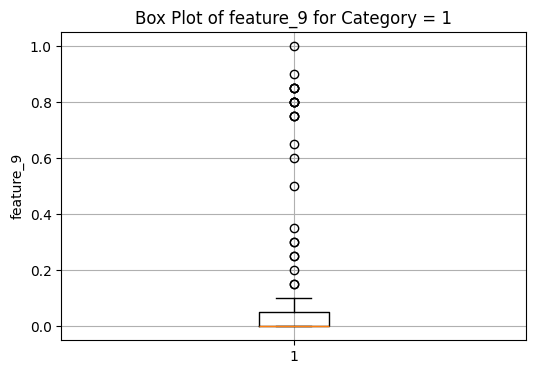

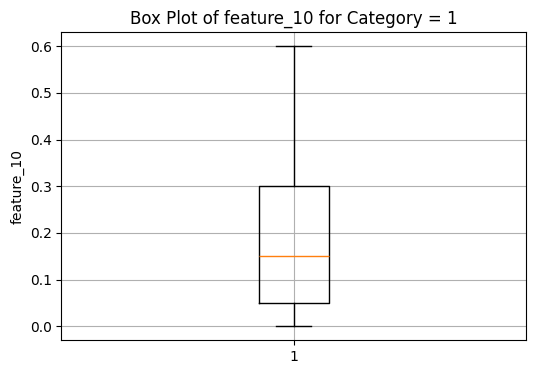

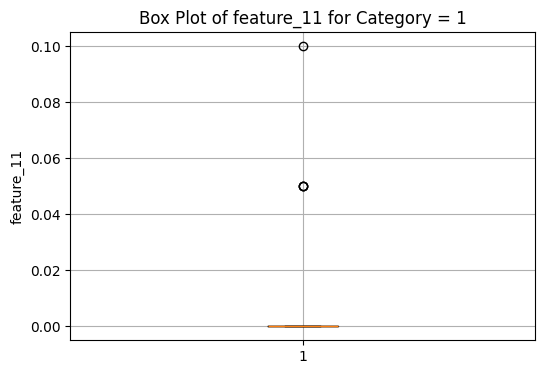

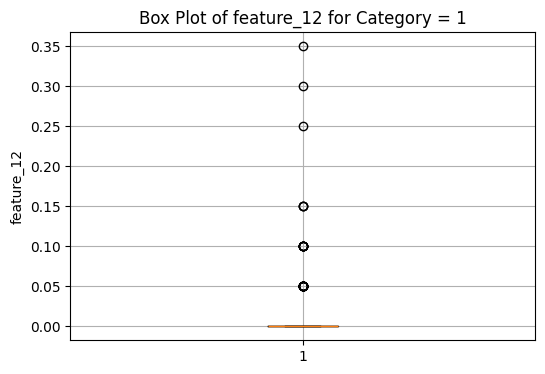

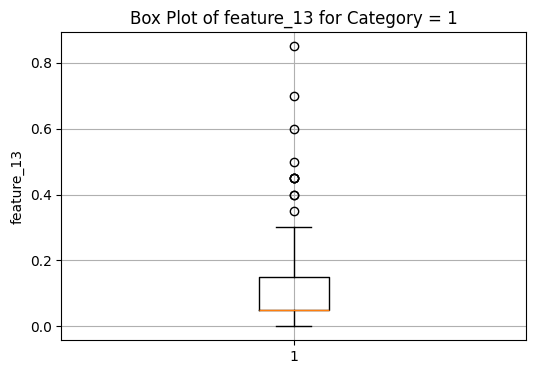

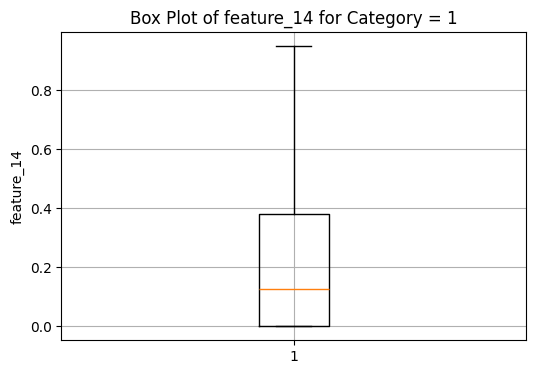

In [28]:
category_1 = final_data[final_data['rock_category'] == 1]
category_2 = final_data[final_data['rock_category'] == 2]
category_3 = final_data[final_data['rock_category'] == 3]

# Create scatter plots for columns 4 to 14
columns_to_plot = final_data.columns[3:14]  # Assuming 0-based indexing

# Create a scatter plot for each column
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.boxplot(category_1[col])
    plt.title(f'Box Plot of {col} for Category = 1')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

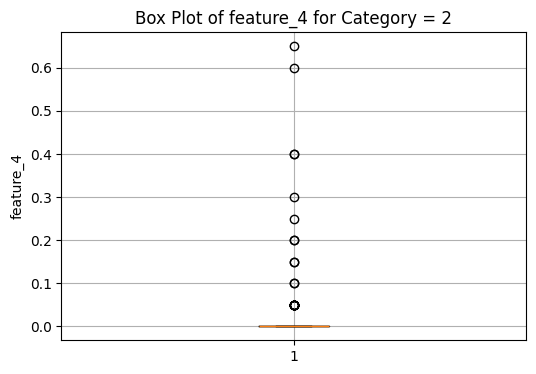

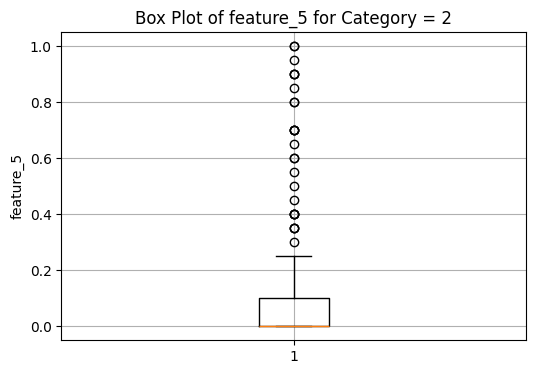

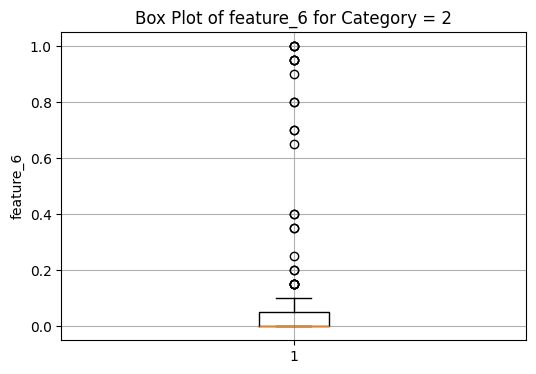

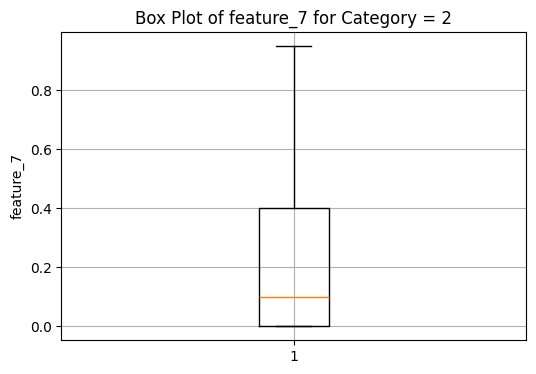

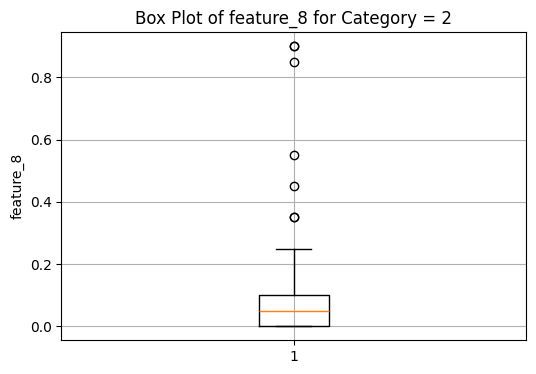

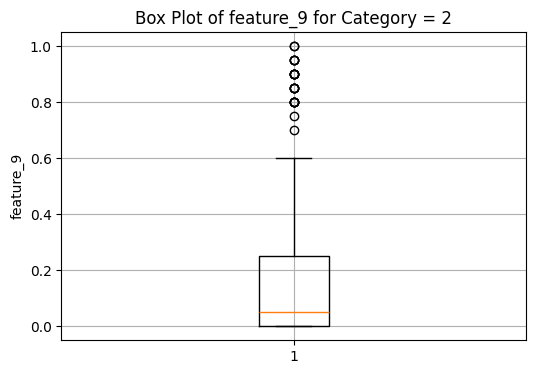

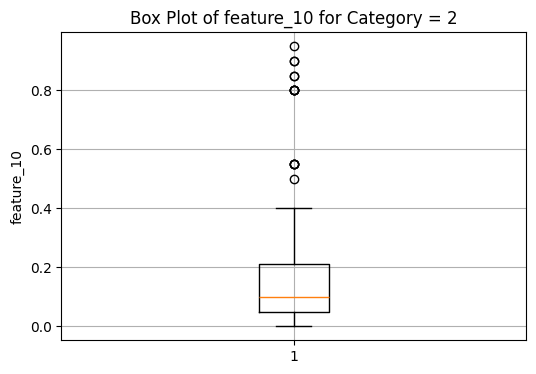

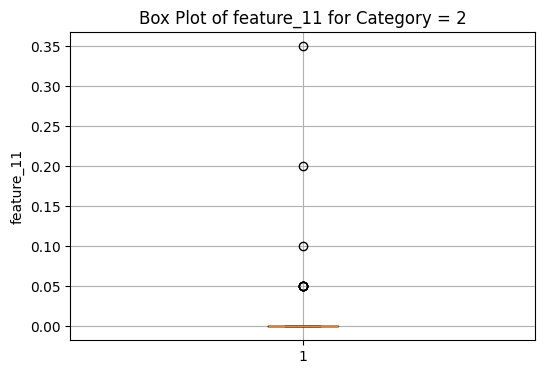

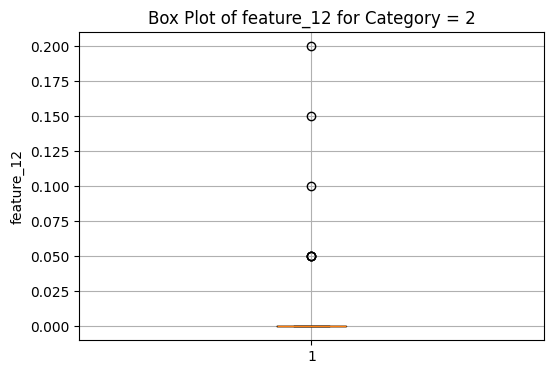

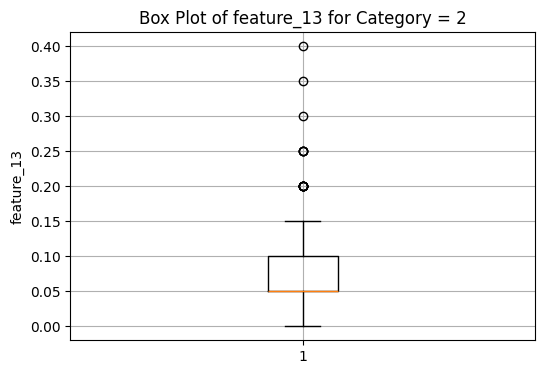

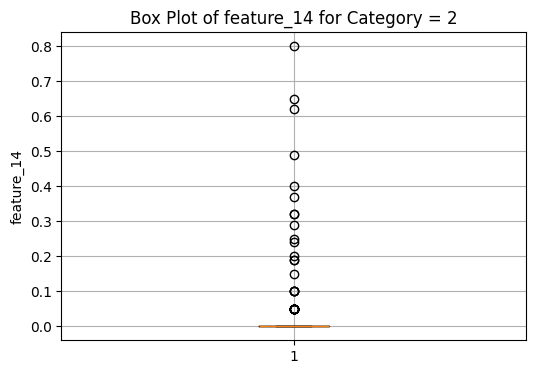

In [29]:
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.boxplot(category_2[col])
    plt.title(f'Box Plot of {col} for Category = 2')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

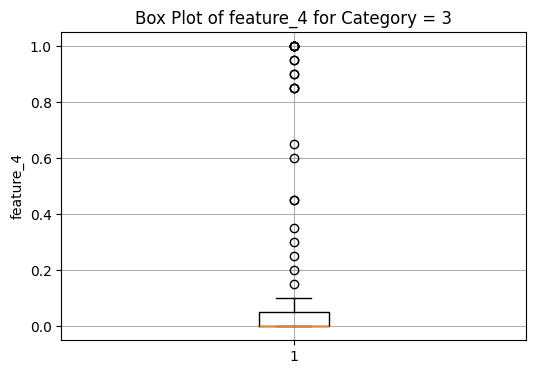

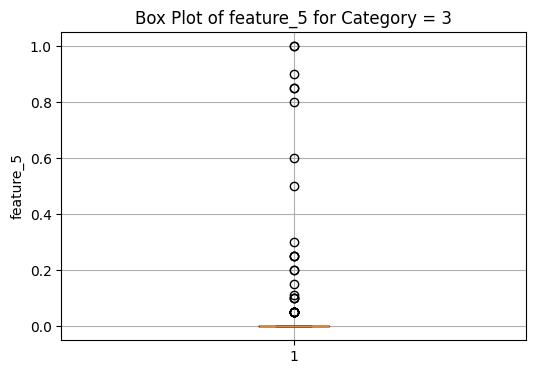

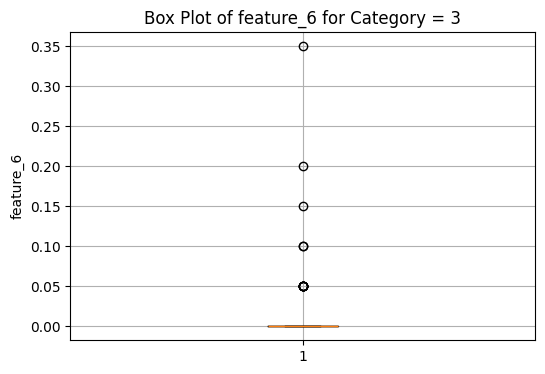

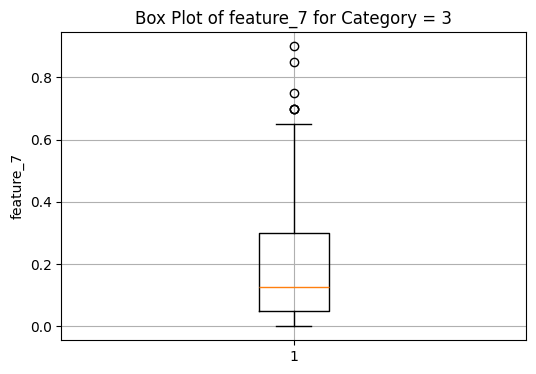

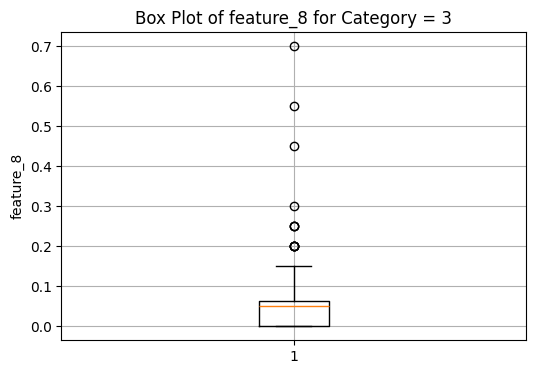

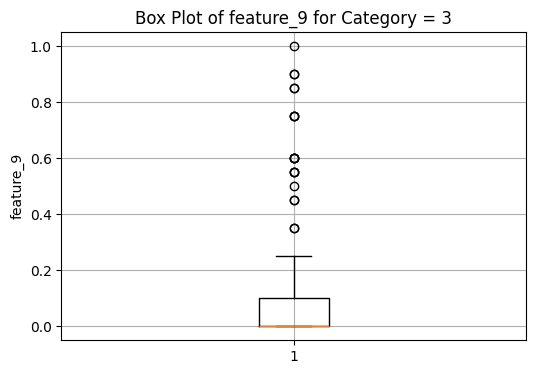

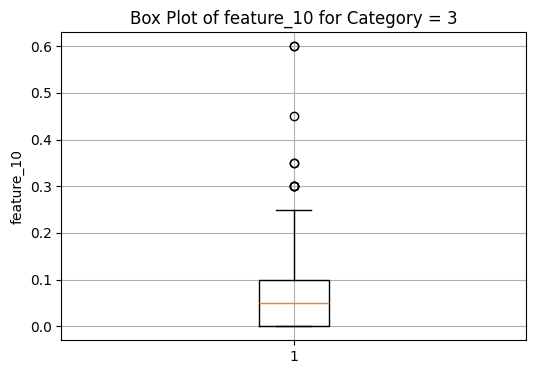

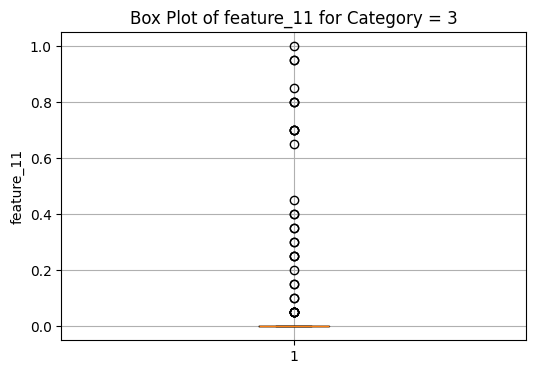

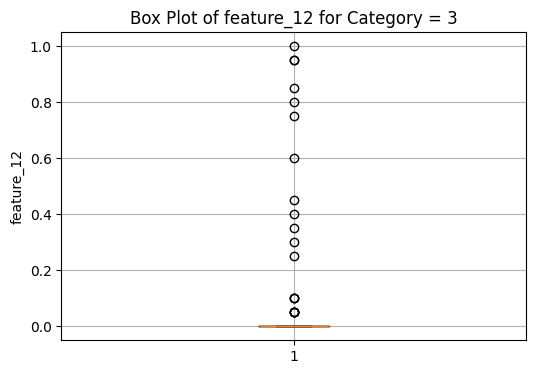

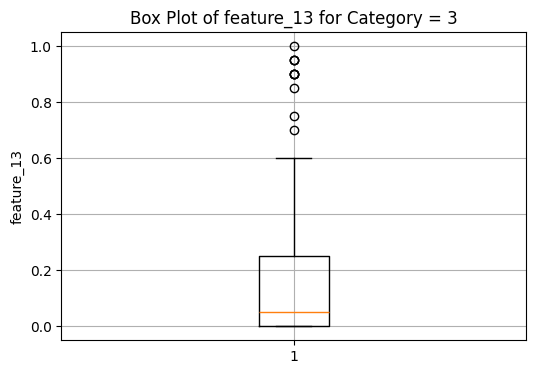

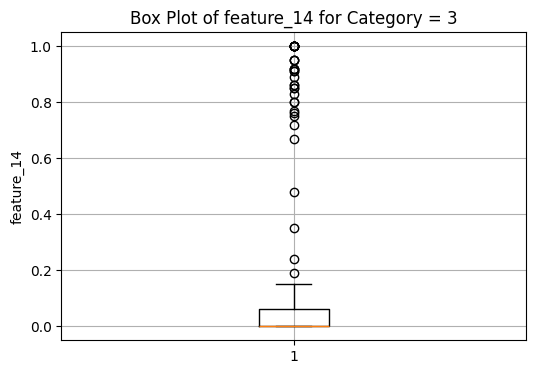

In [30]:
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.boxplot(category_3[col])
    plt.title(f'Box Plot of {col} for Category = 3')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [31]:
final_data.corr(method='pearson')

,rock_number,rock_category,token_number,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
rock_number,1.000000,9.428111e-01,3.326824e-02,-0.028476,0.092424,-0.018078,0.313244,0.131060,-0.043553,-0.229121,0.283548,0.156426,0.222246,-0.124407
rock_category,0.942811,1.000000e+00,-9.070297e-16,0.017446,0.077495,-0.017454,0.266699,0.140553,0.008172,-0.229273,0.258910,0.113872,0.139845,-0.058568
token_number,0.033268,-9.070297e-16,1.000000e+00,-0.002632,-0.049946,-0.035272,0.057043,0.028530,0.002001,-0.036710,0.057032,-0.001513,0.045294,-0.007217
feature_4,-0.028476,1.744612e-02,-2.632315e-03,1.000000,-0.123095,-0.083384,-0.235652,-0.141425,-0.140435,0.005265,-0.092404,-0.041817,-0.136152,0.801022
feature_5,0.092424,7.749481e-02,-4.994586e-02,-0.123095,1.000000,0.196752,-0.026329,0.042965,-0.105445,-0.135787,-0.025440,-0.069152,0.112303,-0.164141
feature_6,-0.018078,-1.745444e-02,-3.527214e-02,-0.083384,0.196752,1.000000,-0.134700,0.045330,-0.070313,-0.116348,-0.056443,-0.056908,-0.071011,-0.118848
feature_7,0.313244,2.666991e-01,5.704335e-02,-0.235652,-0.026329,-0.134700,1.000000,0.061391,0.184191,-0.295079,-0.102496,-0.131038,-0.041839,-0.296328
feature_8,0.131060,1.405526e-01,2.853021e-02,-0.141425,0.042965,0.045330,0.061391,1.000000,-0.095940,0.040470,-0.007707,-0.089083,-0.054820,-0.167766
feature_9,-0.043553,8.171521e-03,2.000768e-03,-0.140435,-0.105445,-0.070313,0.184191,-0.095940,1.000000,-0.224798,-0.018165,-0.037376,-0.315414,-0.181484
feature_10,-0.229121,-2.292728e-01,-3.670989e-02,0.005265,-0.135787,-0.116348,-0.295079,0.040470,-0.224798,1.000000,-0.065659,-0.073539,-0.166148,0.045189


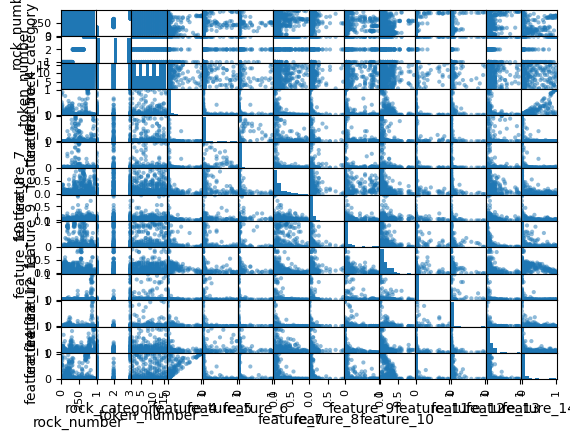

In [32]:
scatter_matrix(final_data,)
plt.show()

In [54]:
train=final_data[final_data['token_number'].between(1,10)]
train=train.drop(['rock_number','token_number'],axis=1)

In [55]:
val=final_data[final_data['token_number'].between(11,14)]
val=val.drop(['rock_number','token_number'],axis=1)

In [56]:
val.head(10)

,rock_category,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
10,1,0.05,0.0,0.00,0.10,0.00,0.00,0.10,0.0,0.0,0.15,0.81
11,1,0.15,0.0,0.00,0.05,0.00,0.00,0.20,0.0,0.0,0.25,0.58
12,1,0.35,0.0,0.00,0.00,0.05,0.00,0.20,0.0,0.0,0.00,0.54
13,1,0.40,0.0,0.00,0.05,0.05,0.00,0.25,0.0,0.0,0.05,0.73
26,1,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.0,0.0,0.25,0.00
27,1,0.10,0.0,0.00,0.00,0.05,0.00,0.15,0.0,0.0,0.20,0.10
28,1,0.00,0.0,0.00,0.15,0.00,0.00,0.20,0.0,0.0,0.10,0.00
29,1,0.00,0.0,0.05,0.10,0.00,0.05,0.05,0.0,0.0,0.20,0.00
42,1,0.05,0.0,0.00,0.00,0.00,0.00,0.40,0.0,0.0,0.05,0.10
43,1,0.05,0.0,0.00,0.00,0.00,0.00,0.35,0.0,0.0,0.10,0.05


In [57]:
test=final_data[final_data['token_number'].between(15,17)]
test=test.drop(['rock_number','token_number'],axis=1)

In [58]:
test.head(10)

,rock_category,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
14,1,0.15,0.0,0.00,0.00,0.05,0.00,0.40,0.0,0.00,0.05,0.45
15,1,0.90,0.0,0.00,0.00,0.00,0.00,0.15,0.0,0.00,0.05,0.92
30,1,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.0,0.00,0.35,0.00
31,1,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.0,0.00,0.70,0.00
46,1,0.10,0.0,0.00,0.00,0.00,0.00,0.35,0.0,0.00,0.10,0.15
47,1,0.00,0.0,0.05,0.00,0.05,0.00,0.45,0.0,0.00,0.05,0.10
62,1,0.05,0.0,0.00,0.00,0.05,0.00,0.40,0.0,0.00,0.05,0.19
63,1,0.00,0.0,0.00,0.15,0.15,0.05,0.00,0.0,0.00,0.10,0.00
78,1,0.15,0.0,0.00,0.00,0.00,0.00,0.30,0.0,0.00,0.00,0.40
79,1,0.05,0.0,0.00,0.00,0.10,0.00,0.30,0.0,0.05,0.05,0.29


In [64]:
X_train=train.drop('rock_category',axis=1)
y_train=train['rock_category']

In [65]:
X_val=val.drop('rock_category',axis=1)
y_val=val['rock_category']

In [66]:
X_test=test.drop('rock_category',axis=1)
y_test=test['rock_category']

In [67]:
def printall_res(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    results = {}
    for name, y_true, y_pred in [('Train', y_train, train_pred),
                                 ('Validation', y_val, val_pred),
                                 ('Test', y_test, test_pred)]:
        results[name] = {
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, average='weighted'),
            'Recall': recall_score(y_true, y_pred, average='weighted'),
            'F1 Score': f1_score(y_true, y_pred, average='weighted')
        }

    return results

In [68]:
import warnings
warnings.filterwarnings("ignore")

#Multinomial Logistic Regression:

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'max_iter': [100, 500, 1000]
}

lr_model = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid, cv=5)
lr_results = printall_res(lr_model, X_train, y_train, X_val, y_val, X_test, y_test)

print("Logistic Regression Results:")
print(lr_results)
print("Best parameters:", lr_model.best_params_)

Logistic Regression Results:
{'Train': {'Accuracy': 0.65, 'Precision': 0.6507262706985315, 'Recall': 0.65, 'F1 Score': 0.6502903130870553}, 'Validation': {'Accuracy': 0.7416666666666667, 'Precision': 0.7402116402116403, 'Recall': 0.7416666666666667, 'F1 Score': 0.7389542483660131}, 'Test': {'Accuracy': 0.7, 'Precision': 0.7143874643874644, 'Recall': 0.7, 'F1 Score': 0.699720315280956}}
Best parameters: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}


In [69]:
#Random Forest:
import warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_results = printall_res(rf_model, X_train, y_train, X_val, y_val, X_test, y_test)

print("Random Forest Results:")
print(rf_results)
print("Best parameters:", rf_model.best_params_)

# Feature importance
importances = rf_model.best_estimator_.feature_importances_
for i, imp in enumerate(importances):
    print(f"Feature {i+1} importance: {imp}")

Random Forest Results:
{'Train': {'Accuracy': 0.91, 'Precision': 0.9102543832086136, 'Recall': 0.91, 'F1 Score': 0.9100225714330721}, 'Validation': {'Accuracy': 0.7666666666666667, 'Precision': 0.766077441077441, 'Recall': 0.7666666666666667, 'F1 Score': 0.7650584795321637}, 'Test': {'Accuracy': 0.65, 'Precision': 0.6486215538847119, 'Recall': 0.65, 'F1 Score': 0.6490306441525954}}
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Feature 1 importance: 0.057450209389735454
Feature 2 importance: 0.07235209094405742
Feature 3 importance: 0.06404978832328839
Feature 4 importance: 0.13113772756355005
Feature 5 importance: 0.0726005478710048
Feature 6 importance: 0.09051126800546765
Feature 7 importance: 0.13066791445244277
Feature 8 importance: 0.0760901144209989
Feature 9 importance: 0.039722614790961196
Feature 10 importance: 0.12449833886357226
Feature 11 importance: 0.14091938537492107


In [70]:
#Support Vector Machine:
import warnings
warnings.filterwarnings("ignore")

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'probability': [True] # Add this line to enable probability estimates
}

svm_model = GridSearchCV(SVC(), param_grid, cv=5)
svm_results = printall_res(svm_model, X_train, y_train, X_val, y_val, X_test, y_test)

print("SVM Results:")
print(svm_results)
print("Best parameters:", svm_model.best_params_)

SVM Results:
{'Train': {'Accuracy': 0.7666666666666667, 'Precision': 0.7685736079328757, 'Recall': 0.7666666666666667, 'F1 Score': 0.7654520917678813}, 'Validation': {'Accuracy': 0.775, 'Precision': 0.7768052869116698, 'Recall': 0.775, 'F1 Score': 0.7717669133469794}, 'Test': {'Accuracy': 0.7, 'Precision': 0.6990740740740741, 'Recall': 0.7, 'F1 Score': 0.6961722488038278}}
Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}


In [99]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model.best_estimator_),
        ('svm', svm_model.best_estimator_),
        ('rf', rf_model.best_estimator_)
    ],
    n_jobs=3,
    voting='hard'
)

ensemble_results = printall_res(ensemble_model, X_train, y_train, X_val, y_val, X_test, y_test)

print("Ensemble Results:")
print(ensemble_results)

Ensemble Results:
{'Train': {'Accuracy': 0.7733333333333333, 'Precision': 0.7746988048705947, 'Recall': 0.7733333333333333, 'F1 Score': 0.7733135874267039}, 'Validation': {'Accuracy': 0.775, 'Precision': 0.7737891737891738, 'Recall': 0.775, 'F1 Score': 0.7726927146608144}, 'Test': {'Accuracy': 0.7, 'Precision': 0.7002923976608187, 'Recall': 0.7, 'F1 Score': 0.6998644986449865}}


In [100]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model.best_estimator_),
        ('svm', svm_model.best_estimator_),
        ('rf', rf_model.best_estimator_)
    ],
    n_jobs=3,
    voting='soft'
)

ensemble_results = printall_res(ensemble_model, X_train, y_train, X_val, y_val, X_test, y_test)

print("Ensemble Results:")
print(ensemble_results)

Ensemble Results:
{'Train': {'Accuracy': 0.8066666666666666, 'Precision': 0.8091472122554908, 'Recall': 0.8066666666666666, 'F1 Score': 0.8071000054000624}, 'Validation': {'Accuracy': 0.75, 'Precision': 0.7489601058801286, 'Recall': 0.75, 'F1 Score': 0.7484192781522451}, 'Test': {'Accuracy': 0.7833333333333333, 'Precision': 0.7829991645781119, 'Recall': 0.7833333333333333, 'F1 Score': 0.7828330206378987}}


In [97]:
human_data = pd.read_csv('trialData.csv')
human_data = human_data[human_data['rocknumber'] <= 480]

human_train = human_data[human_data['block'] <= 3]
human_test = human_data[human_data['block'] == 4]

# human_train_acc = (human_train['category'] == human_train['catresponse']).mean()
# human_test_acc = (human_test['category'] == human_test['catresponse']).mean()

human_train_acc = (human_train.groupby('rocknumber')['cat_correct']).mean()
human_test_acc = (human_test.groupby('rocknumber')['cat_correct']).mean()

print(f"Human Train Accuracy : {human_train_acc.mean()}")
print(f"Human Test Accuracy : {human_test_acc.mean()}")

#avg accuracy
human_acc = human_data.groupby('rocknumber')['cat_correct'].agg(['mean', 'std']).reset_index()
print(f"Human Average Accuracy and std of entire dataset:{human_acc['mean'].mean()}, {human_acc['std'].mean()}")

Human Train Accuracy : 0.5599275656175603
Human Test Accuracy : 0.5984089776752296
Human Average Accuracy and std of entire dataset:0.5770728795545266, 0.44790929606698066


In [142]:
whole_data_X=final_data.drop(['rock_number','rock_category','token_number'],axis=1)
whole_data_y=final_data[['rock_number','rock_category']]
pred=ensemble_model.predict(whole_data_X)

In [144]:
whole_data_y.head()

,rock_number,rock_category
0,1.0,1
1,2.0,1
2,3.0,1
3,4.0,1
4,5.0,1


In [145]:
y_pred_df=pd.DataFrame({'rock_number': whole_data_y['rock_number'].values, 'rock_category': pred})

In [147]:
print(y_pred_df)

     rock_number  rock_category
0            1.0              1
1            2.0              1
2            3.0              1
3            4.0              3
4            5.0              3
..           ...            ...
475        476.0              3
476        477.0              3
477        478.0              3
478        479.0              3
479        480.0              3

[480 rows x 2 columns]


In [158]:
merged_df = pd.merge(whole_data_y, y_pred_df, on='rock_number', suffixes=('_actual', '_pred'))

# Calculate accuracy for each rock number
accuracies = {}

for rock_number in merged_df['rock_number'].unique():
    subset = merged_df[merged_df['rock_number'] == rock_number]
    accuracy = accuracy_score(subset['rock_category_actual'], subset['rock_category_pred'])
    accuracies[rock_number] = accuracy

accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Rock Number', 'Accuracy'])
accuracy_df['Rock Number']=accuracy_df['Rock Number'].astype(int)
accuracy_df.head(50)

,Rock Number,Accuracy
0,1,1.0
1,2,1.0
2,3,1.0
3,4,0.0
4,5,0.0
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,1.0


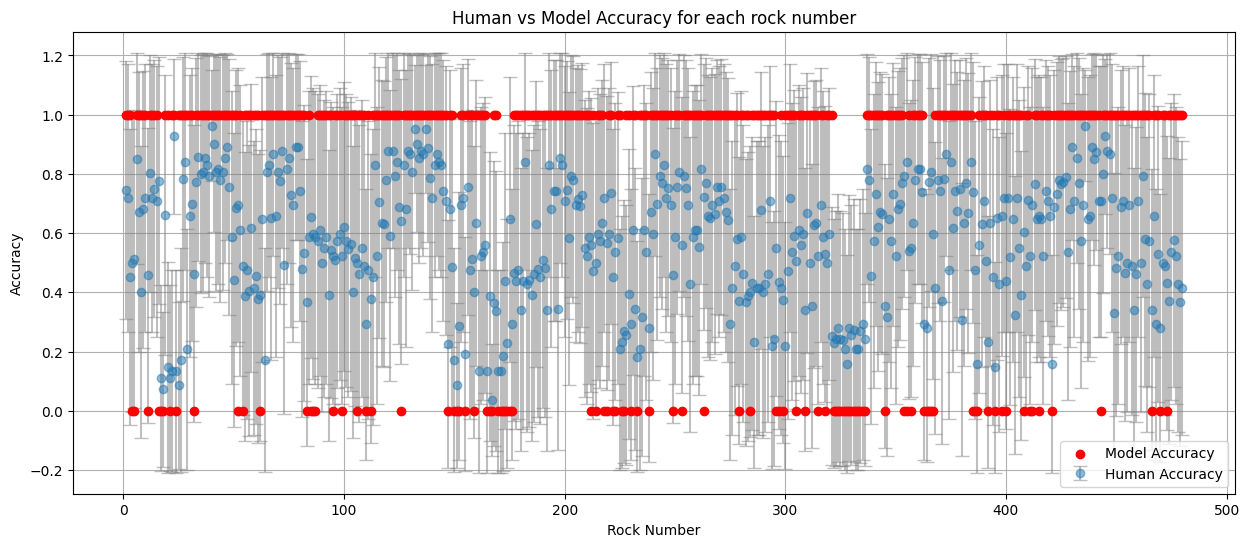

In [160]:
plt.figure(figsize=(15, 6))
plt.errorbar(human_acc['rocknumber'], human_acc['mean'],
             yerr=human_acc['std'], ecolor='gray',fmt='o', capsize=5,
             label='Human Accuracy', alpha=0.5)
#plt.plot(human_acc['rocknumber'], accuracy_df, 'r-', label='Model Accuracy')
plt.scatter(accuracy_df['Rock Number'], accuracy_df['Accuracy'], color='red',
            label='Model Accuracy', zorder=5)
plt.xlabel('Rock Number')
plt.ylabel('Accuracy')
plt.title('Human vs Model Accuracy for each rock number')
plt.legend()
plt.grid(True)
plt.show()
